In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [67]:
df=pd.read_csv('boston.csv')
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [68]:
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

C:\Users\krau8\AppData\Local\Temp\ipykernel_22632\335716713.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(boston['MEDV'], bins=30)


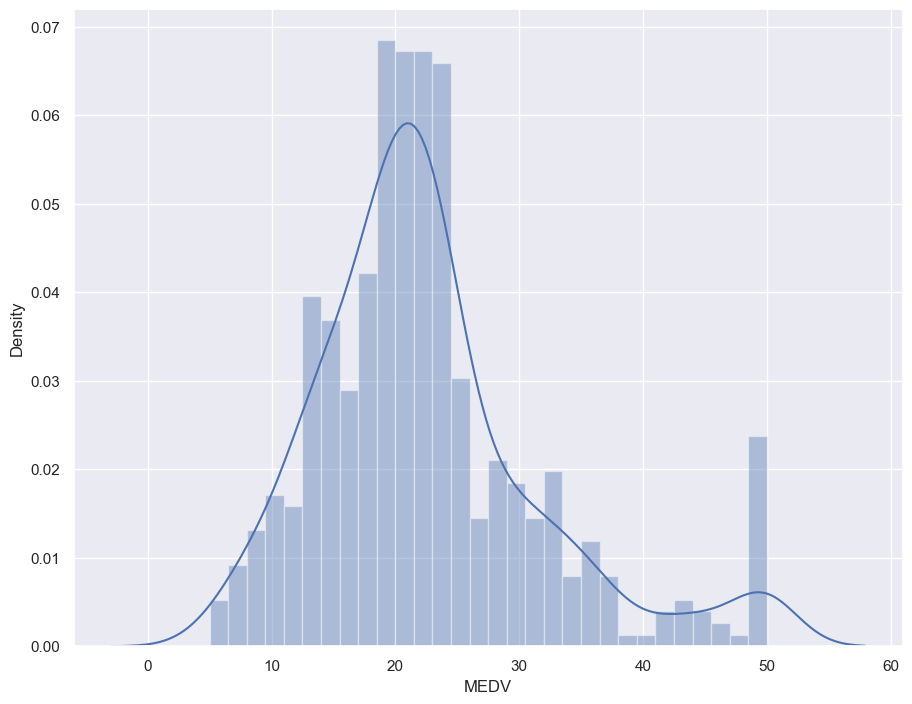

In [69]:
sns.set(rc={'figure.figsize':(10.7,8.27)})

sns.distplot(boston['MEDV'], bins=30)
plt.show()

In [70]:
correlation_matrix = boston.corr().round(2)

<Axes: >

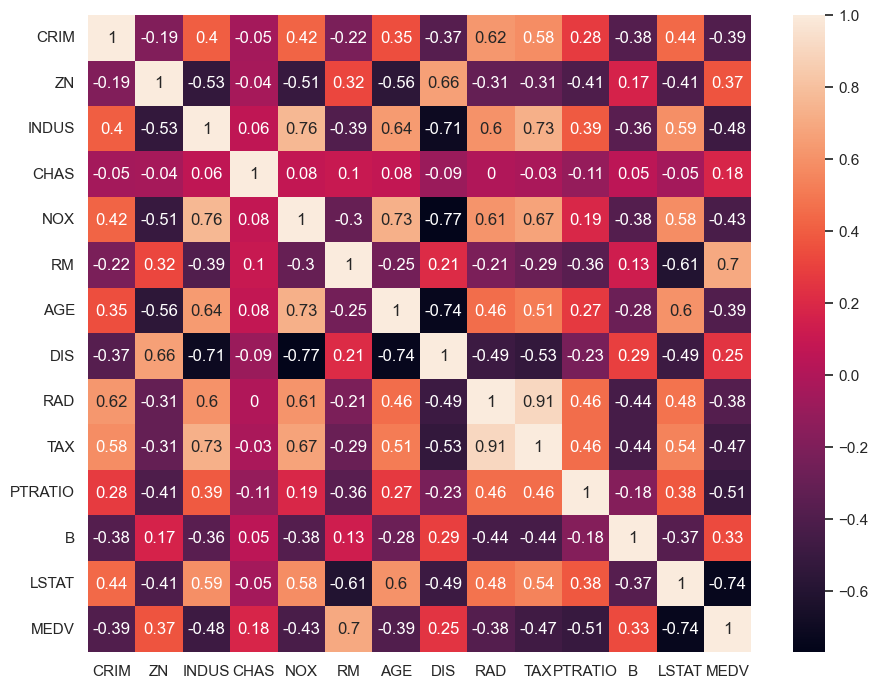

In [71]:
sns.heatmap(data = correlation_matrix, annot=True)

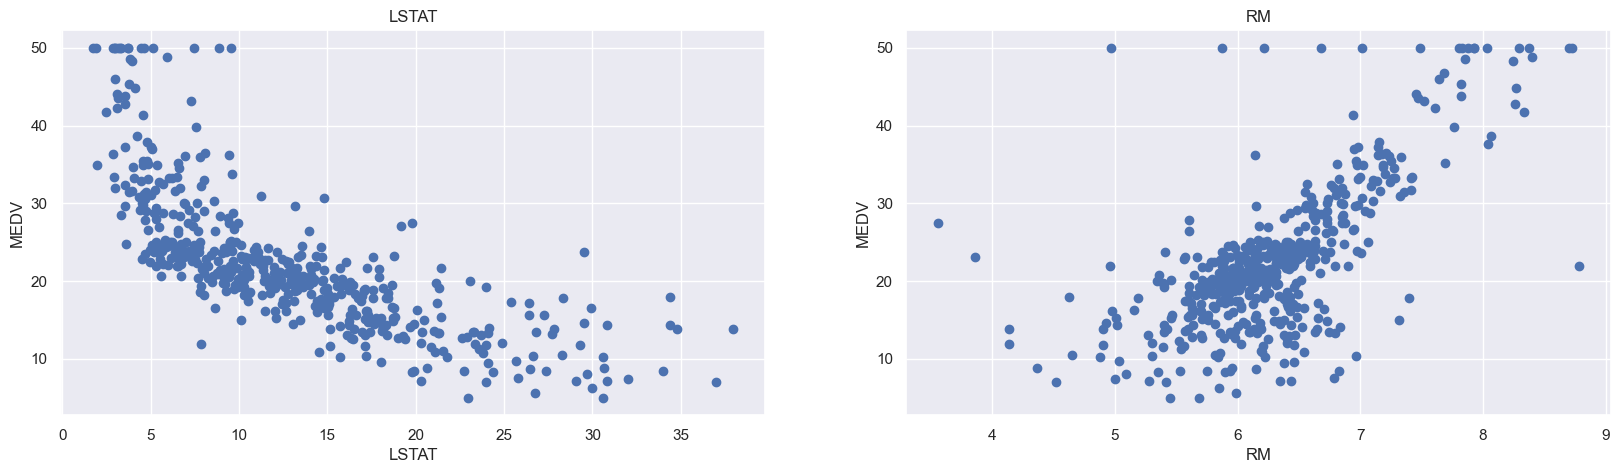

In [72]:
plt.figure(figsize=(20,5))

features = ["LSTAT",'RM']
target = boston['MEDV']

for i, col in enumerate(features):
    plt.subplot(1,len(features) , i+1)
    x = boston[col]
    y = target
    plt.scatter(x,y,marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

In [73]:
X = pd.DataFrame(np.c_[boston['LSTAT'],boston['RM']],columns = ['LSTAT','RM'])
Y = boston['MEDV']

In [74]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2,random_state=20)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 2)
(102, 2)
(404,)
(102,)


In [75]:
from sklearn.impute import SimpleImputer

# Assuming X_train is your feature matrix with missing values
imputer = SimpleImputer(strategy='mean')  # You can use other strategies as well
X_train_imputed = imputer.fit_transform(X_train)

# Now fit your model using X_train_imputed
lin_model.fit(X_train_imputed, Y_train)

LinearRegression()